<a href="https://colab.research.google.com/github/syahputra21/Datamining_Prediksi-Harga-Smartphone/blob/main/Datamining_Prediksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Ganti path sesuai dengan lokasi dataset kamu
file_path = '/content/drive/MyDrive/Datming/Mobile Price Prediction Datatset.csv'
df = pd.read_csv(file_path)

# Tampilkan kolom
print("Kolom:", df.columns.tolist())
df.head()

Kolom: ['Unnamed: 0', 'Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price']


,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [36]:
# Daftar kolom fitur dan target
features = ['Ratings', 'RAM', 'ROM', 'Selfi_Cam', 'Battery_Power' ]
target = 'Price'

# Pastikan semua kolom tersedia
features = [f for f in features if f in df.columns]
if target not in df.columns:
    raise ValueError("Kolom 'Price' tidak ditemukan.")

# Konversi ke float jika perlu (misal jika pakai koma)
df[features] = df[features].replace(',', '.', regex=True).astype(float)
df[target] = df[target].replace(',', '.', regex=True).astype(float)

# Pisahkan X dan y
X = df[features]
y = df[target]

# Split data (tanpa scaling karena model tree-based)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Model dan training
rf_model = RandomForestRegressor(n_estimators=30, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
rf_pred = rf_model.predict(X_test)

# Evaluasi
mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_pred)

print("Random Forest Regressor:")
print(f"MAE  : {mae_rf:.2f}")
print(f"MSE  : {mse_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.4f}")

Random Forest Regressor:
MAE  : 4019.81
MSE  : 251970762.21
RMSE : 15873.59
R²   : 0.8916


In [61]:
xgb_model = XGBRegressor(
    n_estimators=50,
    learning_rate=0.5,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.7,
    random_state=50
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, xgb_pred)

print("🚀 XGBoost Regressor:")
print(f"MAE  : {mae_xgb:.2f}")
print(f"MSE  : {mse_xgb:.2f}")
print(f"RMSE : {rmse_xgb:.2f}")
print(f"R²   : {r2_xgb:.4f}")

🚀 XGBoost Regressor:
MAE  : 2932.82
MSE  : 97805561.57
RMSE : 9889.67
R²   : 0.9579


In [62]:
hasil = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'MAE': [mae_rf, mae_xgb],
    'MSE': [mse_rf, mse_xgb],
    'RMSE': [rmse_rf, rmse_xgb],
    'R2 Score': [r2_rf, r2_xgb]
})

print("📊 Perbandingan Hasil Evaluasi:")
print(hasil)

📊 Perbandingan Hasil Evaluasi:
           Model          MAE           MSE          RMSE  R2 Score
0  Random Forest  4019.806669  2.519708e+08  15873.586936  0.891624
1        XGBoost  2932.816161  9.780556e+07   9889.669437  0.957933


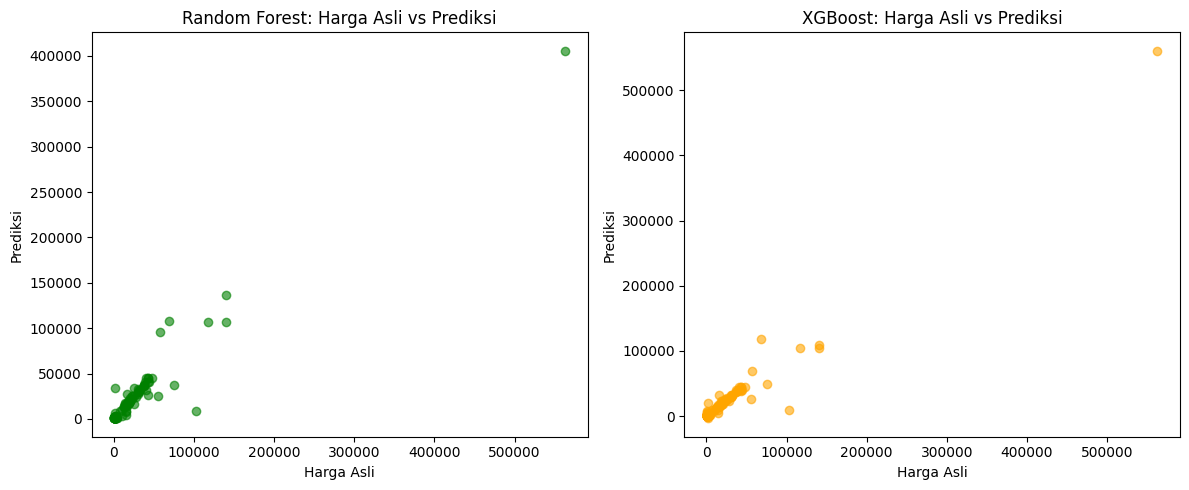

In [63]:
plt.figure(figsize=(12,5))

# Random Forest
plt.subplot(1,2,1)
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.xlabel("Harga Asli")
plt.ylabel("Prediksi")
plt.title("Random Forest: Harga Asli vs Prediksi")

# XGBoost
plt.subplot(1,2,2)
plt.scatter(y_test, xgb_pred, alpha=0.6, color='orange')
plt.xlabel("Harga Asli")
plt.ylabel("Prediksi")
plt.title("XGBoost: Harga Asli vs Prediksi")

plt.tight_layout()
plt.show()

In [40]:
hasil.to_csv('/content/drive/MyDrive/dataset/hasil_evaluasi_xgb_rf.csv', index=False)
print("Hasil evaluasi disimpan ke Google Drive.")

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/dataset'